In [112]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [113]:
data = pd.read_csv('wrangled_transactions.csv')
data.head()

,CustomerID,2010 revenue,days_since_first_purchase,days_since_last_purchase,number_of_purchases,avg_order_cost,2011 revenue
0,12347.0,711.79,23.0,23.0,1.0,711.79,3598.21
1,12348.0,892.80,14.0,14.0,1.0,892.80,904.44
2,12370.0,1868.02,16.0,13.0,2.0,934.01,1677.67
3,12377.0,1001.52,10.0,10.0,1.0,1001.52,626.60
4,12383.0,600.72,8.0,8.0,1.0,600.72,1249.84


In [114]:
data.shape

(738, 7)

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 738 entries, 0 to 737
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 738 non-null    float64
 1   2010 revenue               738 non-null    float64
 2   days_since_first_purchase  738 non-null    float64
 3   days_since_last_purchase   738 non-null    float64
 4   number_of_purchases        738 non-null    float64
 5   avg_order_cost             738 non-null    float64
 6   2011 revenue               738 non-null    float64
dtypes: float64(7)
memory usage: 40.5 KB


## Chuẩn bị dữ liệu

In [116]:
inputs = data[['2010 revenue', 'days_since_last_purchase',	'number_of_purchases',	'avg_order_cost']]
outputs = data['2011 revenue']

## Select important features

In [117]:
# Solution 1: Correlation Matrix with Heatmap

In [118]:
top_feature = data.corr().index

<AxesSubplot: >

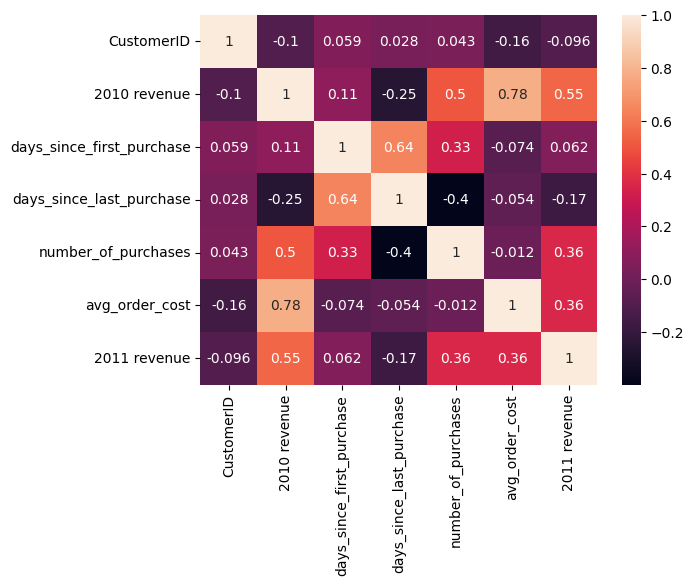

In [119]:
sns.heatmap(data[top_feature].corr(),annot=True)

In [120]:
# Solution 2: ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [121]:
model = ExtraTreesRegressor()
model.fit(inputs,outputs)

ExtraTreesRegressor()

In [122]:
model.feature_importances_

array([0.49112491, 0.18324756, 0.07932762, 0.24629991])

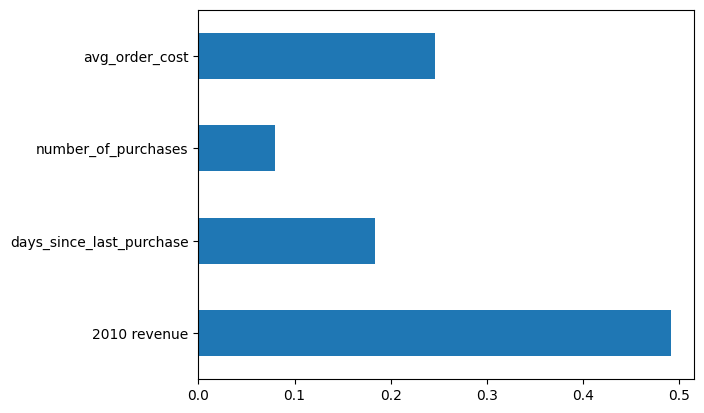

In [123]:
feat_importances = pd.Series(model.feature_importances_, index=inputs.columns)
feat_importances.plot(kind='barh')
plt.show()

In [124]:
# Solution 3: SelectKBest

In [125]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [126]:
bestfeatures = SelectKBest(score_func=f_regression,k='all')
models = bestfeatures.fit(inputs,outputs)

In [127]:
dfscore = pd.DataFrame(models.scores_)
dfcolumn = pd.DataFrame(inputs.columns)
table = pd.concat([dfcolumn,dfscore],axis=1)
table.columns = ['Tên cột','Điểm']
table

,Tên cột,Điểm
0,2010 revenue,316.270947
1,days_since_last_purchase,22.248353
2,number_of_purchases,106.643712
3,avg_order_cost,107.768978


Training Data - Test Data - mô hình 

In [128]:
# Chuẩn bị dữ liệu

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(inputs,outputs,test_size=0.2, random_state= 42)

In [131]:
# Import models

In [132]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [133]:
models = LinearRegression()
models.fit(X_train,y_train)

LinearRegression()

In [134]:
y_pred = models.predict(X_test)

In [135]:
# Dự đoán
# Với '2010 revenue': [1000], 'days_since_last_purchase': [20], 'number_of_purchases': [2],'avg_order_cost': [500] thì '2011 revenue' là bao nhiêu?

In [140]:
X_new = pd.DataFrame({'2010 revenue': [1000],
                      'days_since_last_purchase': [20],
                      'number_of_purchases': [2],
                      'avg_order_cost': [500]})
y_new = models.predict(X_new)
y_new

array([5782.20398341])

In [141]:
# Đánh giá mô hình